<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This repository is a result of collaborative efforts from our dedicated team at the lab. We are committed to advancing the field of biomedical AI and pushing the boundaries of medical data analysis. Your interest and contributions to our work are greatly appreciated. For more information about our lab and ongoing projects, please visit the [BioMind AI Lab website](https://sites.google.com/view/biomind-ai-lab). Thank you for your interest and support!


#XGBoost (eXtreme Gradient Boosting)

**What is XGBoost?**

XGBoost stands for eXtreme Gradient Boosting. It is an advanced implementation of gradient boosting, a machine learning technique where new models are continuously added to correct the errors made by existing models. XGBoost is specifically designed to be highly efficient, flexible, and portable. It has become one of the most popular machine learning algorithms in use today, especially in competitive machine learning and data science due to its performance, speed, and model accuracy.

**Key Features of XGBoost:**

- Gradient Boosting Framework: At its core, XGBoost uses the gradient boosting framework. This means that it builds models sequentially, with each new model correcting errors made by the previous ones. The 'gradient' part of the name indicates that it uses gradient descent to minimize the loss when adding new models.

- Tree-based Models: XGBoost builds an ensemble of decision trees, iteratively. Each tree is constructed in a way that it tries to cover the mistakes or losses of the previous trees. Eventually, the ensemble of trees (a model made up of many tree models) works together to make more accurate predictions.

- Regularization: Unlike traditional gradient boosting, XGBoost incorporates a regularization term (L1 and L2 regularization) to prevent overfitting. This is crucial as it improves the model's generalization capabilities, making XGBoost robust even when dealing with complex datasets that have a lot of noise.

- Scalability and Efficiency: XGBoost is designed to be incredibly efficient and scalable. It can handle large datasets and scale to multi-core systems or even distributed computing frameworks like Hadoop. This is made possible through several advanced engineering solutions such as cache awareness, block structure to support the parallelization of tree construction, and effective memory usage.

- Handling Sparse Data: XGBoost can automatically handle missing data. When it encounters a missing value at a split point while building a tree, it assigns a default direction for the missing values and learns which way to go as trees are added.

- Flexibility: XGBoost allows users to define custom optimization objectives and evaluation criteria, adding a layer of flexibility that lets it be tailored to a wide variety of specific domain requirements.

**Practical Applications:**

- Binary Classification: It's commonly used for tasks like customer churn prediction, loan default prediction, and disease diagnosis.

- Multi-class Classification: Examples include image classification and species categorization.

- Regression: Used for predicting prices, like house prices or stock movements, based on historical data.

**Why Use XGBoost?**

XGBoost is favored because it consistently outperforms other single-algorithm methods in a variety of datasets. It has proven effective across a broad range of regression and classification problems and is often the go-to method for competitions on platforms like Kaggle.


Fitting 4 folds for each of 20 candidates, totalling 80 fits
XGBoost - Accuracy: 0.63, AUC: 0.68


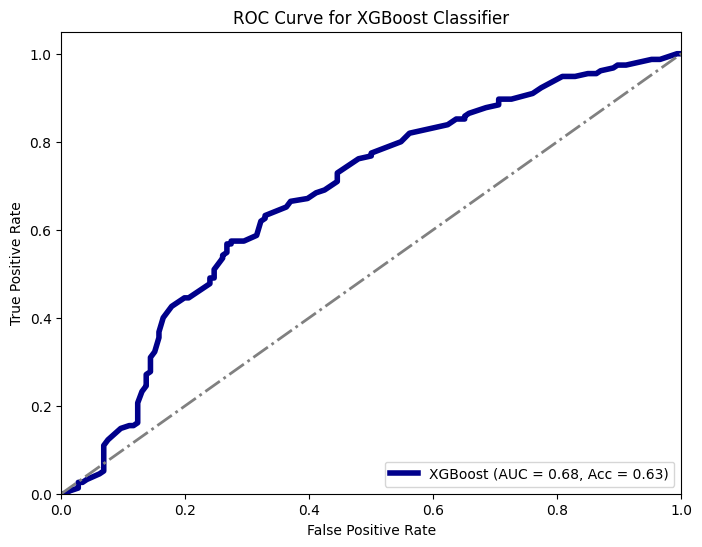

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('/content/Data.xlsx')

# Convert 'ECE Result' to binary (0 and 1), one-hot encode necessary columns
data['ECE_Result'] = data['ECE Result'].map({'Y': 1, 'N': 0})
X_grade_group = pd.get_dummies(data['Preop ISUP Grade Group'], prefix='ISUP_Grade', drop_first=True)
X = pd.concat([data[['PatientAge']], X_grade_group], axis=1)
y = data['ECE_Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 10]
}

# Optimizing XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random_search = RandomizedSearchCV(xgb_classifier, xgb_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
best_xgb_classifier = xgb_random_search.best_estimator_

# Get predicted probabilities and compute ROC AUC
y_prob_best_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_best_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate accuracy
accuracy_best_xgb = accuracy_score(y_test, best_xgb_classifier.predict(X_test))

# Print the accuracy and AUC
print(f'XGBoost - Accuracy: {accuracy_best_xgb:.2f}, AUC: {roc_auc_xgb:.2f}')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkblue', lw=4, linestyle='-', label=f'XGBoost (AUC = {roc_auc_xgb:.2f}, Acc = {accuracy_best_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.savefig('/content/xgboost_roc_curve.pdf', format='pdf', bbox_inches='tight')
plt.show()


The provided Python script demonstrates how to utilize XGBoost within a typical machine learning workflow.

- Initially, the script loads a dataset from an Excel file, processes the data by converting categorical variables into binary format and one-hot encoding other necessary columns.

- It splits the dataset into training and testing sets to ensure the model can be validated independently.

- The script then sets up a hyperparameter grid to fine-tune the XGBoost model using RandomizedSearchCV, which helps in optimizing model parameters like tree depth, learning rate, and more for best performance.

- After training, the script evaluates the XGBoost classifier’s performance by calculating the area under the ROC curve (AUC) and accuracy. Finally, it plots the ROC curve and saves it as a PDF, providing a visual representation of the model's ability to distinguish between the classes.

This workflow is not only effective for model optimization and evaluation but also illustrates the practical use of XGBoost in handling binary classification tasks, showcasing its power in generating robust predictive models.

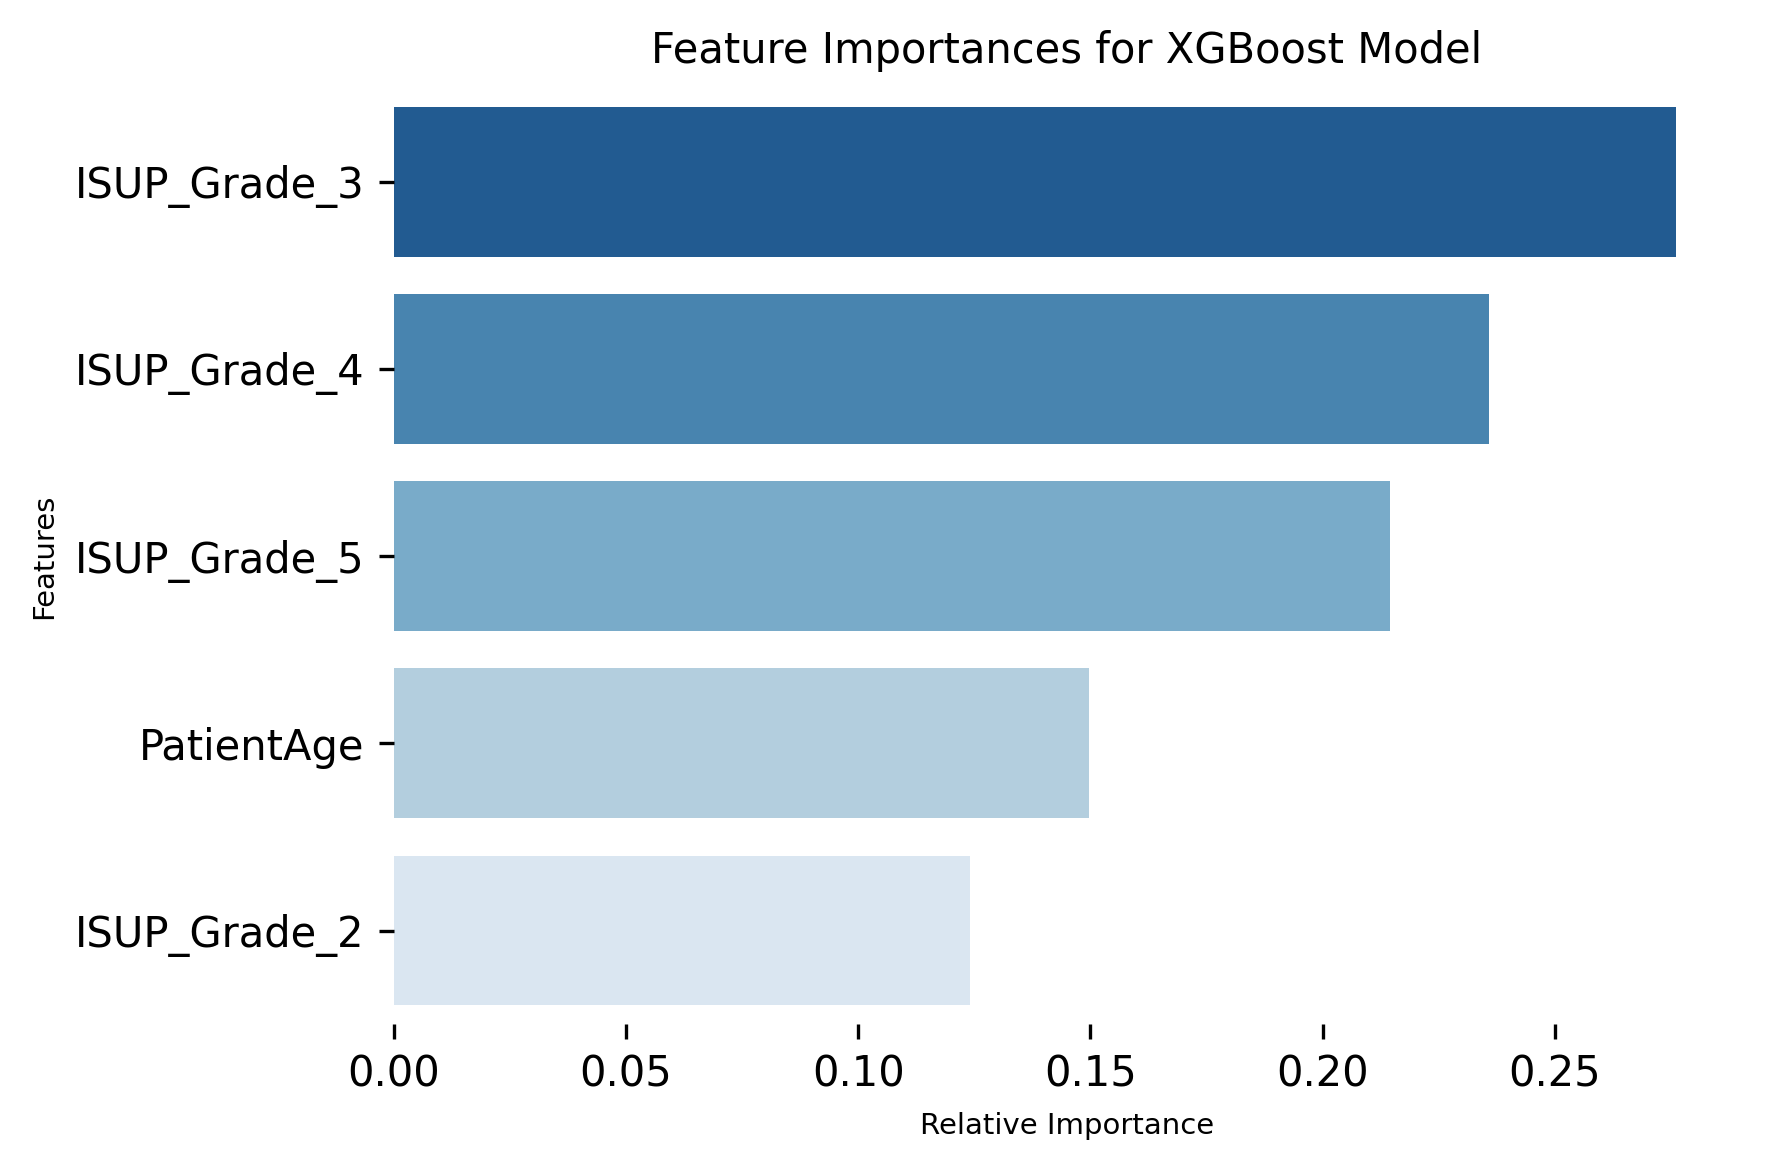

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to get feature importances data
def get_feature_importances_data(model, features):
    importances = model.feature_importances_
    df = pd.DataFrame({'Feature': features, 'Importance': importances})
    df = df.sort_values(by='Importance', ascending=False)
    return df

# Get data for XGBoost model
xgb_data = get_feature_importances_data(best_xgb_classifier, X.columns)

# Generate a color palette from dark blue to light blue, based on importance
palette = sns.color_palette("Blues_r", n_colors=len(xgb_data))

# Plot
plt.figure(figsize=(6, 4), dpi=300)
bar = sns.barplot(x='Importance', y='Feature', hue='Feature', data=xgb_data, dodge=False, palette=palette)
plt.legend([], frameon=False)  # Explicitly remove legend

plt.title('Feature Importances for XGBoost Model', fontsize=10)
plt.xlabel('Relative Importance', fontsize=7)
plt.ylabel('Features', fontsize=7)
sns.despine(left=True, bottom=True)  # Optionally remove the top and right spines

plt.tight_layout()
plt.savefig('/content/xgboost_feature_importances.pdf', format='pdf', bbox_inches='tight')
plt.show()


This Python script demonstrates a sophisticated approach to visualize the importance of features as determined by an XGBoost classifier. XGBoost, which stands for eXtreme Gradient Boosting, is a powerful machine learning algorithm widely recognized for its performance and speed in classification tasks. Feature importance helps in understanding which features most significantly impact the model's predictions, offering insights that can guide further data preprocessing and feature engineering.

**Key Components of the Script:**

- Data Loading and Preparation: The script starts by loading a dataset from an Excel file. It then processes the dataset to prepare it for model training, typically involving encoding categorical variables or handling missing values.

- Model Training: Utilizing the XGBoost classifier, the script trains the model using a specified set of hyperparameters. This model training is focused on how different features influence the outcome of the model.

- Feature Importance Extraction: Once the model is trained, the script extracts and calculates the importance of each feature using XGBoost's built-in functionality. This feature importance is represented as a score indicating how useful each feature was in constructing the boosted decision trees within the model.

- Visualization: The script employs Seaborn and Matplotlib, popular Python visualization libraries, to create a bar plot of the feature importances. Each feature is represented as a bar, with the bar's length indicating the feature's relative importance. The color intensity of the bars varies from light to dark blue, where darker shades represent higher importance. This visual gradient helps to quickly discern which features are most influential, enhancing the interpretability of the model's decision-making process.

- Output: Finally, the visualization is saved as a high-resolution PDF file, making it suitable for presentation or inclusion in reports.

Utility and Application: By analyzing feature importances, data scientists and analysts can identify and focus on the most relevant features, potentially reducing model complexity and improving performance. This script is particularly useful in scenarios where understanding the model's decision basis is crucial, such as in feature selection or during the early stages of model development.